<a href="https://colab.research.google.com/github/Afzal786/Soft_Computing/blob/master/MIT2019072_SOC2020_PCA%26LDA_face_detection_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#python library to plot the images.
from matplotlib import pyplot as plt

#python library to read images 
from matplotlib.image import imread
import numpy as np

#python package to perform the basic linux command to read data from folder
import os

In [2]:

#changing directory to Images folder in order to read the images
os.chdir('Images')

#List is used to store the names of the images
image_names = []

#Reading the images present in the folder and fetches the names of the images
for f in os.listdir(): 
    f_name, f_ext = os.path.splitext(f) 
    image_names.append(f)

#Sorting the names of the images in the alphabetical order
image_names = sorted(image_names)

#checking the current working directory
!pwd
# changing the current working directory to content/

/content/Images


In [3]:
print(len(image_names))
print(image_names)

165
['subject01.abc', 'subject01.glasses', 'subject01.happy', 'subject01.leftlight', 'subject01.noglasses', 'subject01.normal', 'subject01.rightlight', 'subject01.sad', 'subject01.sleepy', 'subject01.surprised', 'subject01.wink', 'subject02.centerlight', 'subject02.glasses', 'subject02.happy', 'subject02.leftlight', 'subject02.noglasses', 'subject02.normal', 'subject02.rightlight', 'subject02.sad', 'subject02.sleepy', 'subject02.surprised', 'subject02.wink', 'subject03.centerlight', 'subject03.glasses', 'subject03.happy', 'subject03.leftlight', 'subject03.noglasses', 'subject03.normal', 'subject03.rightlight', 'subject03.sad', 'subject03.sleepy', 'subject03.surprised', 'subject03.wink', 'subject04.centerlight', 'subject04.glasses', 'subject04.happy', 'subject04.leftlight', 'subject04.noglasses', 'subject04.normal', 'subject04.rightlight', 'subject04.sad', 'subject04.sleepy', 'subject04.surprised', 'subject04.wink', 'subject05.centerlight', 'subject05.glasses', 'subject05.happy', 'subje

In [0]:
#This is used when images names also fetch colab checkpoint as name.First print images names if
#it contains python checkpoint as first element run this command to remove it
#image_names = image_names[1:]

In [0]:
#change directory 
os.chdir('..')

(243, 320)


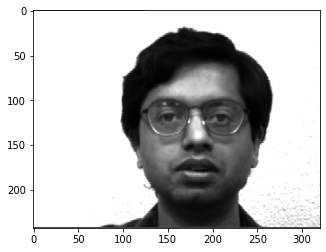

In [5]:

#setting the path to the images
dataset_path = 'Images/'

#setting the directory name
dataset_dir  = os.listdir(dataset_path)

#Checking the images by plotting one of the random image
img_array1 = plt.imread('Images/subject10.glasses') 
print(img_array1.shape)
plt.imshow(img_array1, cmap='gray')
plt.show()


In [6]:

#The height and weight of the image is fixed 
height  = 243
width = 320

#Total number of the images present in the directory
len(image_names)
#Splitting the dataset into 6:4 ratio.
train_image_names = image_names[0:110]

#Defining an array to store the training data.
training_tensor   = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)

#flattening the matrix into a single row. Each row corresponds to a single face
for i in range(len(train_image_names)):
    img = plt.imread(dataset_path + train_image_names[i])
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
   

#40% of the input data goes as testing data
test_image_names = image_names[110:165]

#Defining the array for the testing data
testing_tensor   = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)

#flattening the matrix into a single row. Each row corresponds to a single face
for i in range(len(test_image_names)):
    img = imread(dataset_path + test_image_names[i])
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()

training_tensor = training_tensor.T
testing_tensor = testing_tensor.T

#printing the train and test image names
print(train_image_names)
print(test_image_names)   
print("Training data shape : {} ".format(training_tensor.shape))
print("Testing data shape : {} ".format(testing_tensor.shape))

['subject01.abc', 'subject01.glasses', 'subject01.happy', 'subject01.leftlight', 'subject01.noglasses', 'subject01.normal', 'subject01.rightlight', 'subject01.sad', 'subject01.sleepy', 'subject01.surprised', 'subject01.wink', 'subject02.centerlight', 'subject02.glasses', 'subject02.happy', 'subject02.leftlight', 'subject02.noglasses', 'subject02.normal', 'subject02.rightlight', 'subject02.sad', 'subject02.sleepy', 'subject02.surprised', 'subject02.wink', 'subject03.centerlight', 'subject03.glasses', 'subject03.happy', 'subject03.leftlight', 'subject03.noglasses', 'subject03.normal', 'subject03.rightlight', 'subject03.sad', 'subject03.sleepy', 'subject03.surprised', 'subject03.wink', 'subject04.centerlight', 'subject04.glasses', 'subject04.happy', 'subject04.leftlight', 'subject04.noglasses', 'subject04.normal', 'subject04.rightlight', 'subject04.sad', 'subject04.sleepy', 'subject04.surprised', 'subject04.wink', 'subject05.centerlight', 'subject05.glasses', 'subject05.happy', 'subject05

In [7]:

mean_face = np.zeros((height*width,1))


mean_face = np.mean(training_tensor,axis=1)

print(mean_face.reshape(mean_face.shape[0],1).shape)

(77760, 1)


In [8]:


normalised_training_tensor = np.ndarray(shape=( height*width,len(train_image_names)))

#subtracting the data points from their mean value in order to find the normalized vector
for i in range(height*width):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face[i])
normalised_training_tensor.shape

(77760, 110)

In [9]:
#Calculating the co-variance matrix
cov_matrix = np.dot(normalised_training_tensor.T, normalised_training_tensor)
print(cov_matrix.shape)
print(cov_matrix)

(110, 110)
[[ 2.04208905e+08  7.49858043e+07  7.54067202e+07 ... -1.75646679e+07
  -1.03208987e+07 -2.00572063e+07]
 [ 7.49858043e+07  1.53093477e+08  1.32388824e+08 ...  7.69992171e+06
   8.21899894e+06 -1.25775266e+06]
 [ 7.54067202e+07  1.32388824e+08  1.51519376e+08 ...  1.19156596e+07
   1.74051939e+07  5.12892825e+06]
 ...
 [-1.75646679e+07  7.69992171e+06  1.19156596e+07 ...  1.96492113e+08
   1.60484893e+08  1.77617884e+08]
 [-1.03208987e+07  8.21899894e+06  1.74051939e+07 ...  1.60484893e+08
   1.99085124e+08  1.47377897e+08]
 [-2.00572063e+07 -1.25775266e+06  5.12892825e+06 ...  1.77617884e+08
   1.47377897e+08  1.89509252e+08]]


In [10]:

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# sort eigenvectors by the value of eigenvalues
print("eigenvalues shape : ", eigenvalues.shape)
print("eigenvalues : ", eigenvalues)
print("eigenvectors shape : ", eigenvectors.shape)
print("eigenvectors : ", eigenvectors)


eigenvalues shape :  (110,)
eigenvalues :  [ 1.19477767e+10+0.00000000e+00j  6.18174620e+09+0.00000000e+00j
  3.80713869e+09+0.00000000e+00j  3.02565612e+09+0.00000000e+00j
  1.33446779e+09+0.00000000e+00j  1.14174088e+09+0.00000000e+00j
  1.05222090e+09+0.00000000e+00j  9.19162782e+08+0.00000000e+00j
  6.90943264e+08+0.00000000e+00j  5.92190937e+08+0.00000000e+00j
  4.55397499e+08+0.00000000e+00j  3.70753902e+08+0.00000000e+00j
  3.48016928e+08+0.00000000e+00j  2.96131961e+08+0.00000000e+00j
  2.54418415e+08+0.00000000e+00j  2.34268303e+08+0.00000000e+00j
  2.00634734e+08+0.00000000e+00j  1.91858449e+08+0.00000000e+00j
  1.72203276e+08+0.00000000e+00j  1.61941663e+08+0.00000000e+00j
  1.50476441e+08+0.00000000e+00j  1.41569400e+08+0.00000000e+00j
  1.31154163e+08+0.00000000e+00j  1.24646941e+08+0.00000000e+00j
  1.13889670e+08+0.00000000e+00j  1.03650757e+08+0.00000000e+00j
  9.85984384e+07+0.00000000e+00j  9.51261666e+07+0.00000000e+00j
  8.87998152e+07+0.00000000e+00j  8.48818164e+0

In [11]:

#Calculating the eigen faces
U = []
size = cov_matrix.shape[0]
for i in range(size):
    U.append(np.dot(normalised_training_tensor,eigenvectors[:,i]))

U = np.array(U)
U = U.T
print(U.shape)
print(U)


(77760, 110)
[[ 6.07475772e+01+0.00000000e+00j -9.33806455e+01+0.00000000e+00j
  -5.80792954e+00+0.00000000e+00j ... -3.80806497e-14+0.00000000e+00j
   2.42028619e-14-7.27889971e-15j  2.42028619e-14+7.27889971e-15j]
 [ 9.43906067e+01+0.00000000e+00j -1.07673477e+02+0.00000000e+00j
  -6.23414142e+00+0.00000000e+00j ... -5.57331958e-14+0.00000000e+00j
   3.56381591e-14-1.03181352e-14j  3.56381591e-14+1.03181352e-14j]
 [ 1.14649074e+02+0.00000000e+00j -1.04791693e+02+0.00000000e+00j
  -8.85915789e+00+0.00000000e+00j ... -3.81916720e-14+0.00000000e+00j
   1.97064587e-14-5.88418203e-15j  1.97064587e-14+5.88418203e-15j]
 ...
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j 

In [12]:
#calculating the Sign faces
weight_vector = np.dot(U.T, normalised_training_tensor)
print(weight_vector.shape)
print(weight_vector)


(110, 110)
[[ 8.64153189e+08+0.00000000e+00j  4.34648207e+08+0.00000000e+00j
   4.11577820e+08+0.00000000e+00j ...  6.30110453e+07+0.00000000e+00j
   8.30665828e+07+0.00000000e+00j  5.12210323e+07+0.00000000e+00j]
 [ 1.39555874e+08+0.00000000e+00j -2.17398211e+08+0.00000000e+00j
  -2.24375302e+08+0.00000000e+00j ... -5.04114220e+08+0.00000000e+00j
  -4.47744925e+08+0.00000000e+00j -4.95964857e+08+0.00000000e+00j]
 [-1.63203697e+08+0.00000000e+00j -3.28054421e+08+0.00000000e+00j
  -2.88635379e+08+0.00000000e+00j ...  3.27314381e+08+0.00000000e+00j
   2.86678364e+08+0.00000000e+00j  3.51155674e+08+0.00000000e+00j]
 ...
 [-3.68645036e-08+0.00000000e+00j -4.89408895e-08+0.00000000e+00j
  -1.91525312e-08+0.00000000e+00j ... -1.02067008e-08+0.00000000e+00j
  -1.16722983e-08+0.00000000e+00j -5.25965341e-10+0.00000000e+00j]
 [ 3.13155360e-08-1.21192145e-08j  2.27217074e-08-3.99899328e-09j
   7.28724515e-09+3.51189392e-10j ... -3.08413408e-09+2.31122466e-09j
   2.75017168e-09+3.60302801e-10j -4

In [13]:
#Calculating the overall mean of the sign faces
overall_mean = np.mean(weight_vector, axis = 1)
overall_mean = overall_mean.reshape(overall_mean.shape[0],1)
print(overall_mean.shape)

(110, 1)


In [0]:
#calculating the scatter within matrix of the classes
#It consist of 10 classes and each class consist of 11 images
SW = np.zeros([110,110])
for i in range(10):
    ind = i * 11
    V = weight_vector[:,ind:ind+6]
    mean_local = np.mean(V, axis = 1)
    mean_local = mean_local.reshape(mean_local.shape[0],1)
    mean = np.repeat(mean_local, 6,axis = 1)
    diff = V - mean
    variance = np.dot(diff, diff.T)
    SW = SW + variance


In [15]:
#calculating the scatter between matrix of the classes
SB = np.zeros([110,110])
print(variance.shape)
for i in range(10):
    j = i+11
    V = weight_vector[:,i:j]
    mean_local = np.mean(V, axis = 1)
    mean_local = mean_local.reshape(mean_local.shape[0],1)
    diff = mean_local - overall_mean
    sigma = np.dot(diff, mean_local.T)
    SB = SB  + sigma

(110, 110)


In [16]:
#calculating the J matrix
J = np.dot(np.linalg.pinv(SW), SB)
print(J.shape)


(110, 110)


In [17]:

#finding eigenvalues and eigenvectors of the matrix J
eigenval, eigenvec = np.linalg.eig(J)
fisher_faces = np.dot(eigenvec.T, weight_vector)
print(fisher_faces.shape)

(110, 110)


In [18]:
#tesing of the model is done using rest of the 5 classes of the data-set out of 15 classes present

weight_vector_test = np.dot(U.T, testing_tensor)
print(weight_vector_test.shape)
print(weight_vector_test)

(110, 55)
[[ 1.69540410e+09+0.00000000e+00j  1.74339489e+09+0.00000000e+00j
   1.85258620e+09+0.00000000e+00j ...  8.39489220e+08+0.00000000e+00j
   8.73593470e+08+0.00000000e+00j  1.51243950e+09+0.00000000e+00j]
 [-2.69966637e+09+0.00000000e+00j -2.82046025e+09+0.00000000e+00j
  -2.69319234e+09+0.00000000e+00j ... -3.48689838e+09+0.00000000e+00j
  -3.46648236e+09+0.00000000e+00j -3.39083150e+09+0.00000000e+00j]
 [-1.52150451e+09+0.00000000e+00j -1.62529185e+09+0.00000000e+00j
  -1.66274831e+09+0.00000000e+00j ... -1.61816333e+09+0.00000000e+00j
  -1.55292976e+09+0.00000000e+00j -1.67927974e+09+0.00000000e+00j]
 ...
 [-1.92736160e-07+0.00000000e+00j -1.87986732e-07+0.00000000e+00j
  -1.91748849e-07+0.00000000e+00j ... -1.81696055e-07+0.00000000e+00j
  -1.73241674e-07+0.00000000e+00j -2.11452747e-07+0.00000000e+00j]
 [ 5.15008330e-08-3.63307496e-08j  4.87671555e-08-3.32952129e-08j
   5.01708880e-08-3.63906167e-08j ...  4.57440997e-09-2.28613351e-08j
   3.81985587e-09-2.20231931e-08j  3.

In [19]:
#Calculating the fisher faces
projected_fisher_faces = np.dot(eigenvec.T, weight_vector_test)
print(projected_fisher_faces.shape)

(110, 55)


In [20]:
#testing the face recognition of the test images on the model

validation = []
count = 0
for i in range(55) : 
    ith_wv = projected_fisher_faces[:,i]
    ans = 0
    index = 0
    for j in range(55):
        jth_wv = projected_fisher_faces[:,j]
        diff = ith_wv - jth_wv
        diff = np.absolute(diff)
        sm = np.sum(diff)
        if ans == 0 :
            ans = sm
            index = j
        else :
            if sm < ans:
                ans = sm
                index = j
    print(test_image_names[index])
    if test_image_names[index].split('.')[0] == test_image_names[i].split('.')[0]:
        count = count + 1
        validation.append(1)
    else:
        validation.append(0)

subject11.glasses
subject11.sleepy
subject11.normal
subject11.sleepy
subject11.sleepy
subject11.surprised
subject11.surprised
subject13.wink
subject11.wink
subject12.centerlight
subject12.surprised
subject12.glasses
subject12.rightlight
subject12.surprised
subject12.sleepy
subject13.wink
subject13.wink
subject12.surprised
subject12.sleepy
subject12.wink
subject12.wink
subject13.happy
subject13.leftlight
subject13.sad
subject13.sad
subject13.sleepy
subject13.wink
subject13.wink
subject15.rightlight
subject13.sleepy
subject13.surprised
subject13.wink
subject15.centerlight
subject14.glasses
subject14.sad
subject14.wink
subject14.wink
subject14.wink
subject14.wink
subject15.rightlight
subject14.wink
subject14.wink
subject14.wink
subject15.leftlight
subject15.wink
subject15.surprised
subject15.sad
subject15.surprised
subject15.sleepy
subject15.sleepy
subject15.wink
subject15.wink
subject15.surprised
subject15.wink
subject15.wink


In [21]:
#Accuracy obtained is given by number of correct recognition
print("accuracy = ", (count*100)/55, "%")

accuracy =  81.81818181818181 %


In [22]:
#It shows where the image recognised is correct out of 55 test images
print(validation)

[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
